<a href="https://colab.research.google.com/github/dipu-k/churn-prediction-by-DK/blob/main/churn_prediction_by_dipanshu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/churn (1).csv")

# New Section

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Categorical Columns: ['Geography', 'Gender']


In [ ]:
# For the gender we will map it to 0 & 1 , so Femals : 0 , Males : 1

df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})

In [ ]:
# For the Geography we will use the one hot encoding technique
df = pd.get_dummies(df, columns=["Geography"])

In [ ]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
305,667,1,31,1,119266.69,1,1,1,28257.63,0,True,False,False
3737,663,1,27,8,0.00,1,1,1,188007.99,0,False,False,True
5527,698,1,38,2,130015.24,1,1,1,41595.30,0,True,False,False
8051,605,0,56,1,74129.18,2,1,1,62199.78,1,False,True,False
7162,607,1,34,9,132439.99,1,1,0,177747.72,0,False,False,True


In [ ]:
sns.set_theme(style="darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

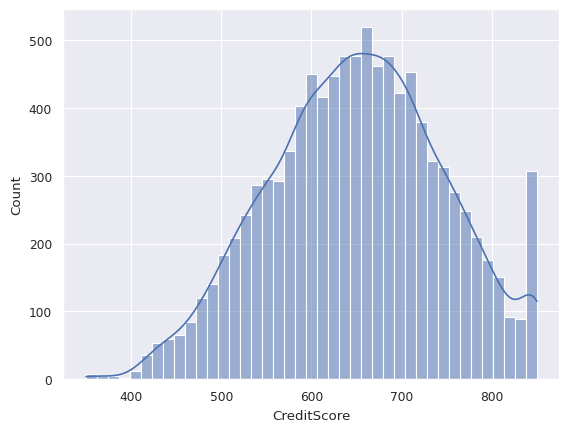

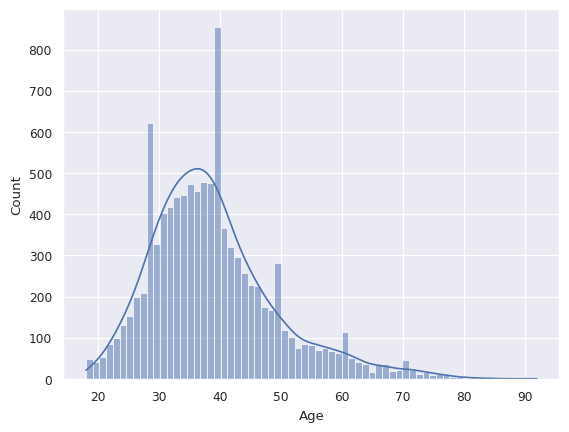

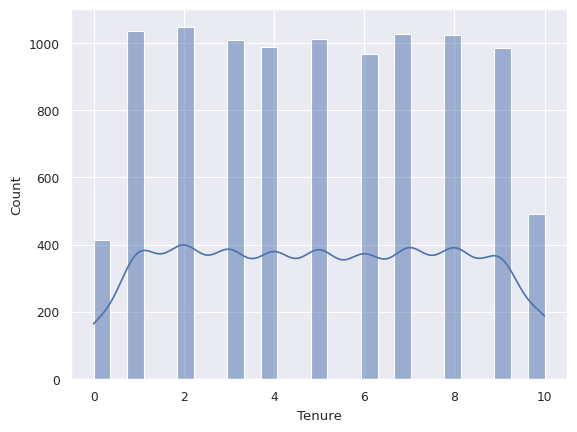

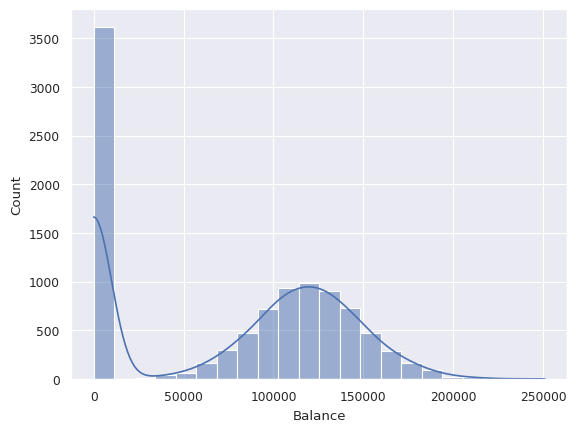

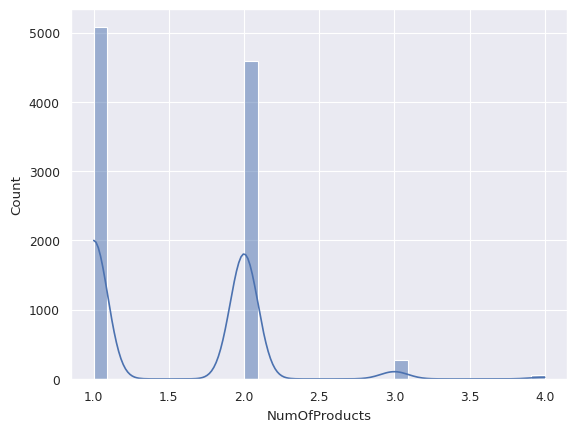

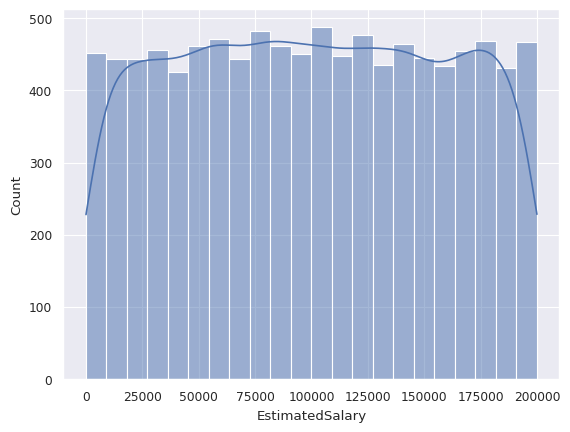

In [ ]:
histplot_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in histplot_cols:
    sns.histplot(df[col], kde=True)
    plt.show()

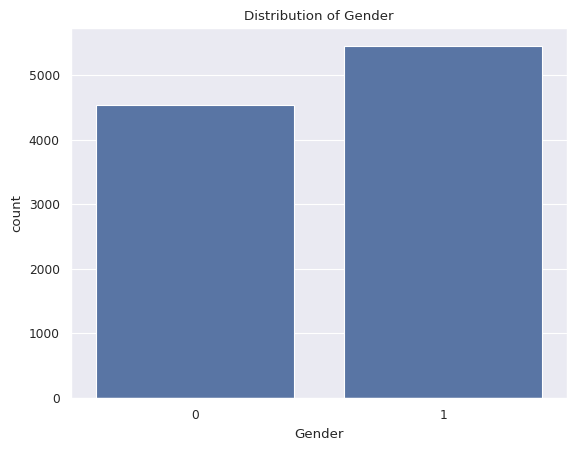

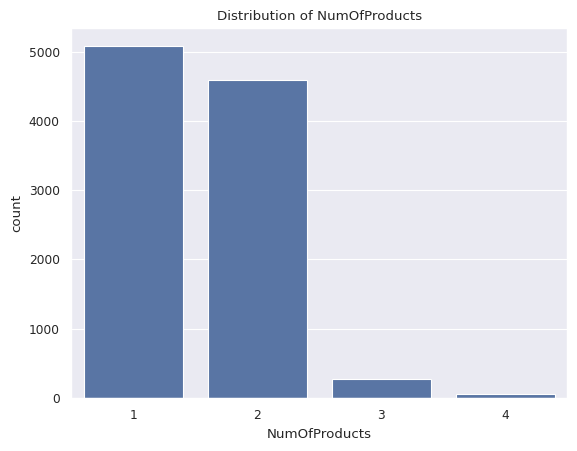

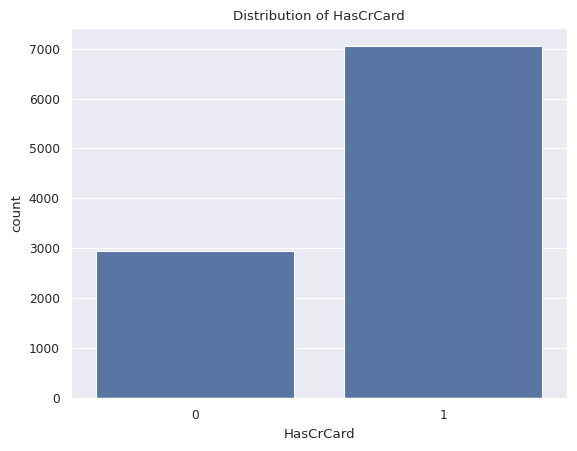

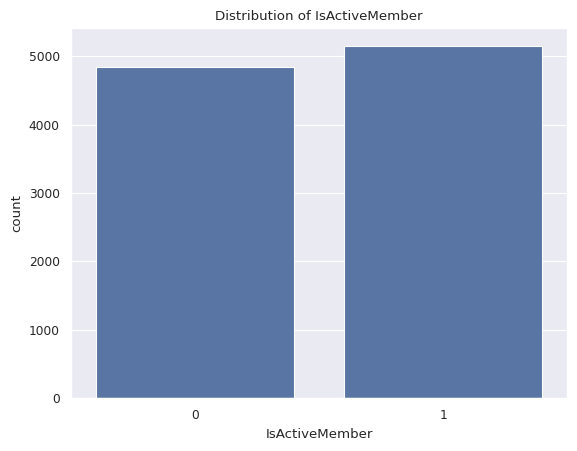

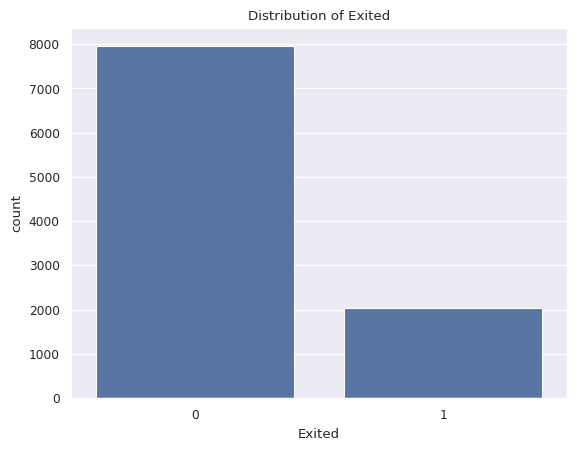

In [ ]:
barplot_cols = [ 'Gender','NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']
for col in barplot_cols:
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


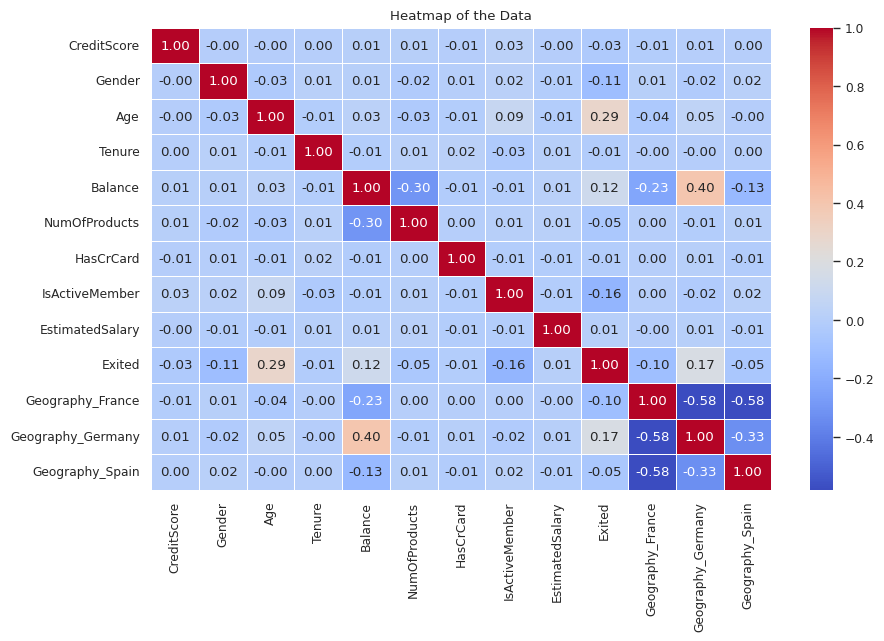

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of the Data')
plt.show()

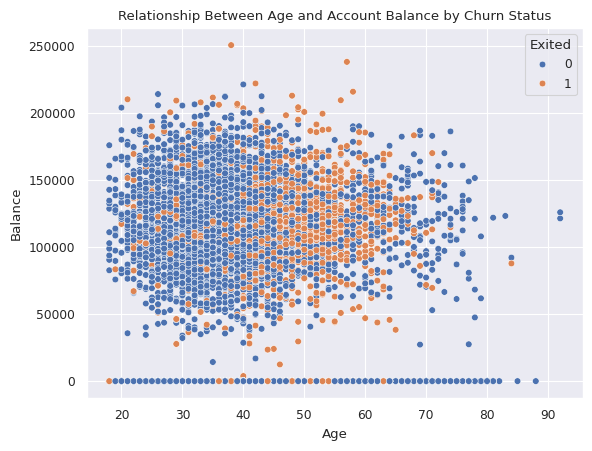

In [ ]:
sns.scatterplot(x='Age', y='Balance', hue="Exited", data=df)
plt.title('Relationship Between Age and Account Balance by Churn Status')
plt.show()


In [ ]:
df['Age_Groups'] = pd.qcut(df['Age'], 6, labels = [1, 2, 3, 4, 5, 6])

In [ ]:
df['Customer_Lifetime_Percentage'] = (df['Tenure'] / df['Age']) * 100

In [ ]:
df["CreditsScore_Groups"] = pd.qcut(df['CreditScore'], 8, labels = [1, 2, 3, 4, 5, 6,7,8])

In [ ]:
df["Balance_score_groups"] = pd.qcut(df['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df["EstSalaryScore_groups"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
df.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Age_Groups,Customer_Lifetime_Percentage,CreditsScore_Groups,Balance_score_groups,EstSalaryScore_groups
9005,745,0,38,7,0.00,2,1,1,194230.82,0,False,False,True,4,18.421053,7,2,10
495,765,1,36,8,92310.54,2,1,1,72924.56,0,False,True,False,3,22.222222,7,3,4
3951,807,0,47,9,167664.83,1,0,0,125440.11,1,True,False,False,5,19.148936,8,5,7
2793,627,1,23,5,184244.86,1,1,0,103099.22,0,False,True,False,1,21.739130,4,5,6
4802,512,1,39,3,0.00,1,1,0,134878.19,0,False,False,True,4,7.692308,1,1,7
5314,743,1,45,10,144677.19,3,1,0,22512.44,1,False,True,False,5,22.222222,7,5,2
7682,700,1,29,8,0.00,2,0,1,152097.02,0,False,False,True,1,27.586207,6,2,8
4485,751,1,34,9,108513.25,2,1,1,27097.82,0,False,True,False,2,26.470588,7,3,2
7466,700,0,30,4,116377.48,1,1,1,134417.31,0,False,True,False,1,13.333333,6,4,7
1205,780,1,76,10,121313.88,1,0,1,64872.33,0,True,False,False,6,13.157895,8,4,4


In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Age_Groups,Customer_Lifetime_Percentage,CreditsScore_Groups,Balance_score_groups,EstSalaryScore_groups
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False,5,4.761905,3,1,6
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True,4,2.439024,3,3,6
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False,5,19.047619,1,5,6
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False,4,2.564103,6,1,5
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True,5,4.651163,8,4,4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import pickle
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_filename):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"\nModel saved to {model_filename}")


In [ ]:
train_and_evaluate_model(LogisticRegression(), X_train_res, X_test, y_train_res, y_test, 'LR_model.pkl')
train_and_evaluate_model(SVC(probability=True), X_train_res, X_test, y_train_res, y_test, 'SVC_model.pkl')
train_and_evaluate_model(XGBClassifier(), X_train_res, X_test, y_train_res, y_test, 'XGB_model.pkl')
train_and_evaluate_model(RandomForestClassifier(), X_train_res, X_test, y_train_res, y_test, 'RF_model.pkl')
train_and_evaluate_model(KNeighborsClassifier(), X_train_res, X_test, y_train_res, y_test, 'KNN_model.pkl')
train_and_evaluate_model(GradientBoostingClassifier(), X_train_res, X_test, y_train_res, y_test, 'GBC_model.pkl')

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1607
           1       0.39      0.75      0.52       393

    accuracy                           0.72      2000
   macro avg       0.66      0.73      0.66      2000
weighted avg       0.82      0.72      0.75      2000


Model saved to LR_model.pkl
Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1607
           1       0.44      0.70      0.54       393

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.77      0.78      2000


Model saved to SVC_model.pkl
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.66      0.52      0.58       393

    ac

In [ ]:
models = [
    ('xgboost', XGBClassifier()),
    ('GBC',GradientBoostingClassifier()),
    ("LR" ,LogisticRegression()),
    ("SVC",SVC(probability=True)),
    ("RF", RandomForestClassifier())
]

train_and_evaluate_model(VotingClassifier(estimators=models, voting='soft'), X_train_res, X_test, y_train_res, y_test, 'voting_soft_model.pkl')


Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.60      0.64      0.62       393

    accuracy                           0.85      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.85      0.85      0.85      2000


Model saved to voting_soft_model.pkl
